# Chapter 09


## Grover Ancilla

Ch 9: Grover with ancilla qubits
--------------------------------


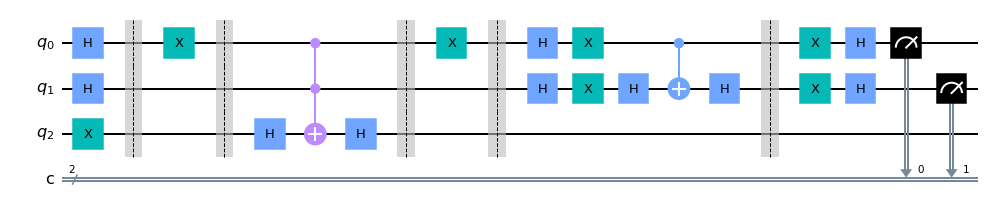

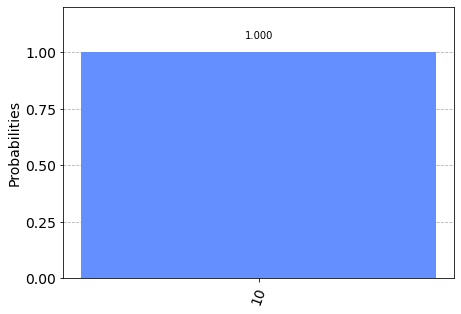

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from IPython.core.display import display
from qiskit.tools.visualization import plot_histogram

print("Ch 9: Grover with ancilla qubits")
print("--------------------------------")

# Create 3 qubit circuit with two classical bits
qc=QuantumCircuit(3,2)


qc.h([0,1])
qc.x(2)

# Code for the oracle
qc.barrier([0,1,2])
qc.x(0)
qc.barrier([0,1,2])

# Phase kickback using the ancilla qubit
qc.h(2)
qc.ccx(0,1,2)
qc.h(2)

# End code for the oracle
qc.barrier([0,1,2])
qc.x(0)
qc.barrier([0,1,2])

# Amplifier
qc.h([0,1])
qc.x([0,1])
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.barrier([0,1,2])
qc.x([0,1])
qc.h([0,1])

# Measure two qubits
qc.measure([0,1],[0,1])

# Display circuit and execute on simulator
display(qc.draw('mpl'))

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1)
result = job.result()
counts = result.get_counts(qc)

display(plot_histogram(counts))

## Grover Functions

## KickBack

Ch 9: Phase kickback
--------------------

Let's start with initalizing a single qubit to |0>...


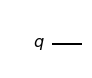

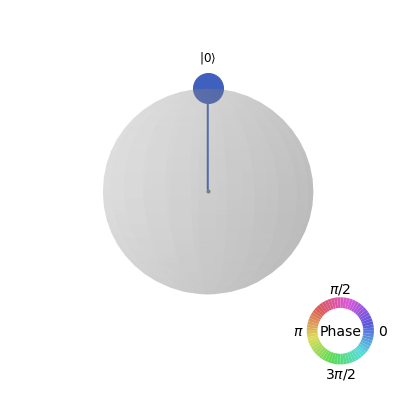

Statevector:
 1.0 |0⟩  0.0 |1⟩ 
Press Enter to set the qubit in superposition...


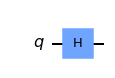

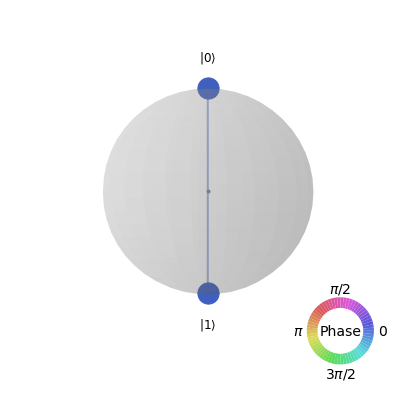

Statevector:
 0.707 |0⟩  0.707 |1⟩ 
Press Enter to add a phase shift...


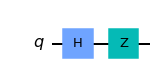

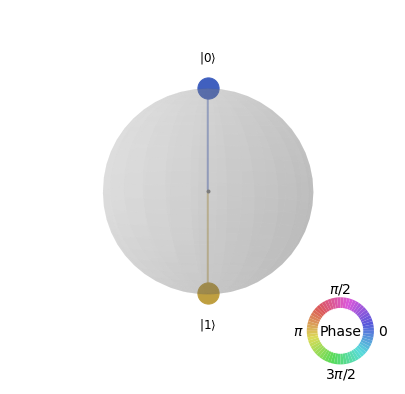

Statevector:
 0.707 |0⟩  -0.707 |1⟩ 
Press Enter to create a two qubit circuit...


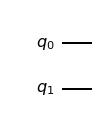

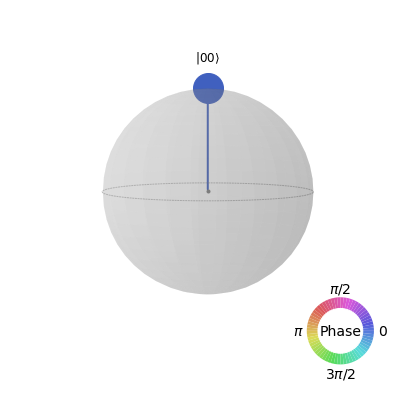

Statevector:
 1.0 |00⟩  0.0 |01⟩  0.0 |10⟩  0.0 |11⟩ 
Press Enter to set qubits in superposition...


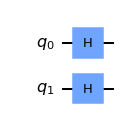

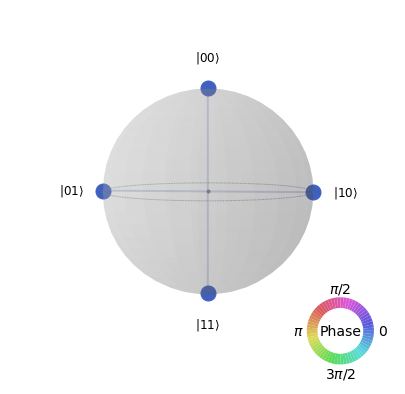

Statevector:
 0.5 |00⟩  0.5 |01⟩  0.5 |10⟩  0.5 |11⟩ 
Press Enter to phase shift second qubit using Z gate...


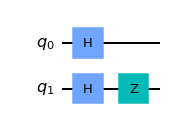

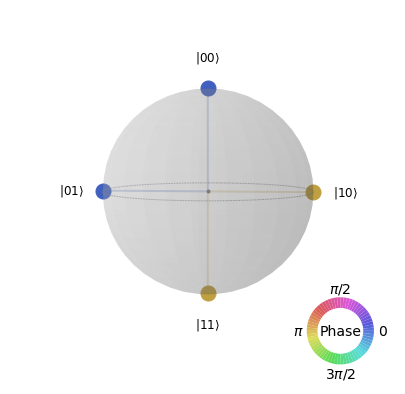

Statevector:
 0.5 |00⟩  0.5 |01⟩  -0.5 |10⟩  -0.5 |11⟩ 
Press Enter to phase shift first qubit using Z gate...


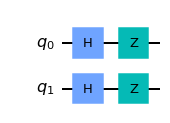

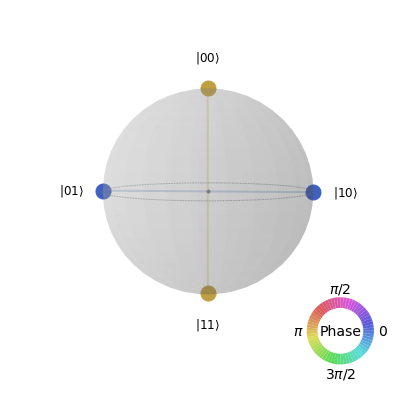

Statevector:
 0.5 |00⟩  -0.5 |01⟩  -0.5 |10⟩  0.5 |11⟩ 
Press Enter to create a new circuit...


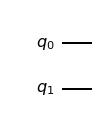

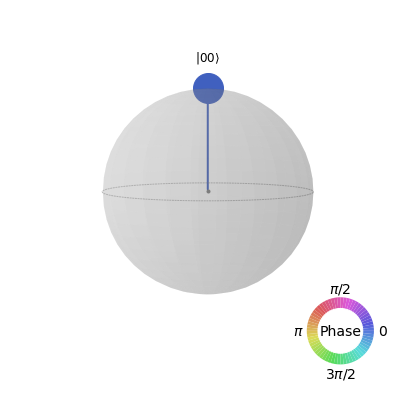

Statevector:
 1.0 |00⟩  0.0 |01⟩  0.0 |10⟩  0.0 |11⟩ 
Press Enter to set qubits in superposition...


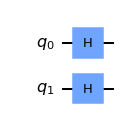

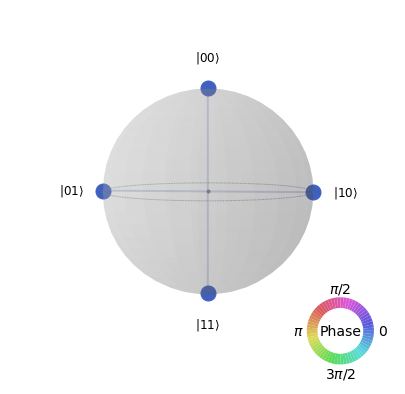

Statevector:
 0.5 |00⟩  0.5 |01⟩  0.5 |10⟩  0.5 |11⟩ 
Press Enter to phase shift second qubit using Z gate...


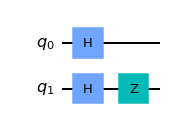

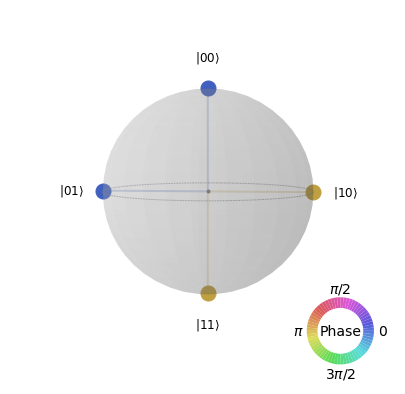

Statevector:
 0.5 |00⟩  0.5 |01⟩  -0.5 |10⟩  -0.5 |11⟩ 
Press Enter to add a CX...


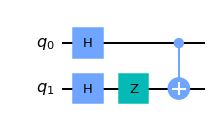

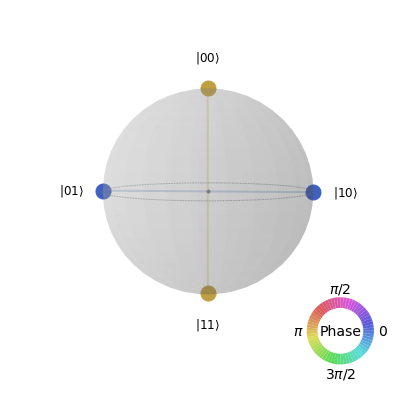

Statevector:
 0.5 |00⟩  -0.5 |01⟩  -0.5 |10⟩  0.5 |11⟩ 


In [4]:
# Importing Qiskit
from qiskit import QuantumCircuit
# Import display circuit from our Grover collection
from grover_function import display_circuit

def main():
    # First, let's see a phase shift
    print("Ch 9: Phase kickback")
    print("--------------------")

    print("\nLet's start with initalizing a single qubit to |0>...")
    qc1 = QuantumCircuit(1)
    display_circuit(qc1,True,False)

    input("Press Enter to set the qubit in superposition...")
    qc1.h(0)
    display_circuit(qc1,True,False)

    input("Press Enter to add a phase shift...")
    qc1.z(0)
    display_circuit(qc1,True,False)

    input("Press Enter to create a two qubit circuit...")
    qc = QuantumCircuit(2)
    display_circuit(qc,True,False)

    input("Press Enter to set qubits in superposition...")
    qc.h([0,1])
    display_circuit(qc,True,False)

    input("Press Enter to phase shift second qubit using Z gate...")
    qc.z(1)
    display_circuit(qc,True,False)

    input("Press Enter to phase shift first qubit using Z gate...")
    qc.z(0)
    display_circuit(qc,True,False)

    input("Press Enter to create a new circuit...")
    qc = QuantumCircuit(2)
    display_circuit(qc,True,False)

    input("Press Enter to set qubits in superposition...")
    qc.h([0,1])
    display_circuit(qc,True,False)

    input("Press Enter to phase shift second qubit using Z gate...")
    qc.z(1)
    display_circuit(qc,True,False)

    input("Press Enter to add a CX...")
    qc.cx(0,1)
    display_circuit(qc,True,False)

if __name__ == '__main__':
    main()

## Classic Search

Ch 10: Classical search
-----------------------
Searching in a scrambled database with 4 entries:
 ('00', '01', '10', '11')

Enter a two bit string for the two qubit state to search for, such as '10' ('Exit' to stop):
10
Number of searches to test:
10
Average searches to find: 2.2


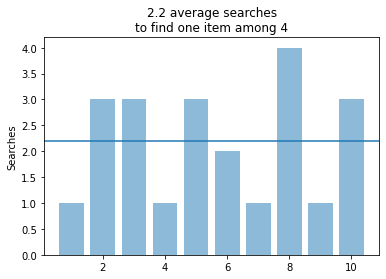


Enter a two bit string for the two qubit state to search for, such as '10' ('Exit' to stop):
01
Number of searches to test:
1
Average searches to find: 4


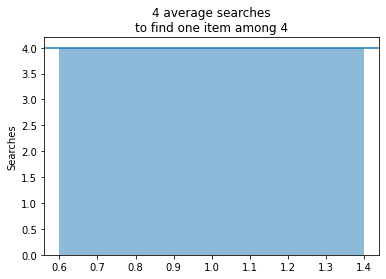


Enter a two bit string for the two qubit state to search for, such as '10' ('Exit' to stop):
exit
Number of searches to test:



ValueError: ignored

In [7]:
def simple_search(database, oracle):
    # Simple linear search for an item, returns the position
    for position, post in enumerate(database):
        if post == oracle:
            return position

def plot_results(average,search,values):
    import matplotlib.pyplot as plt
    from statistics import mean 
    print("Average searches to find:", mean(average))
    # Plot the search data
    plt.bar(search, average, align='center', alpha=0.5)
    plt.ylabel('Searches')
    plt.title(str(mean(average))+' average searches\nto find one item among '+str(len(values)))
    plt.axhline(mean(average))
    plt.show()

def main():
    import random
    # Create 'database' and set initial oracle
    values=("00","01","10","11")
    oracle=""
    print("Ch 10: Classical search")
    print("-----------------------")
    print("Searching in a scrambled database with "+str(len(values))+" entries:\n", values)
    while oracle!="exit":
        average=[]
        search=[]
        oracle=input("\nEnter a two bit string for the two qubit state to search for, such as '10' ('Exit' to stop):\n")
        searches=int(input("Number of searches to test:\n"))
        # Run the search algorithm m number of times
        for m in range(searches):
            # Create unordered database by randomizing the 'values' database
            database=random.sample(values,len(values))
            result=simple_search(database, oracle)
            average.append(result+1)
            search.append(m+1)
        # Display the average number of searches needed to find the item
        plot_results(average,search,values)

if __name__ == '__main__':
    main()

## Grover Main


Ch 9: The Grover search algorithm 
----------------------------------
Enter the number of qubits (2-5):
5
Input your 5-bit oracle. E.g: 10000:
10101
Oracle circuit for |10101⟩


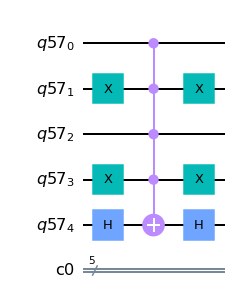

Unitary matrix:

[[1.00 0.00 0.00 ... 0.00 0.00 0.00]
 [0.00 1.00 0.00 ... 0.00 0.00 0.00]
 [0.00 0.00 1.00 ... 0.00 0.00 0.00]
 ...
 [0.00 0.00 0.00 ... 1.00 0.00 0.00]
 [0.00 0.00 0.00 ... 0.00 1.00 0.00]
 [0.00 0.00 0.00 ... 0.00 0.00 1.00]]
Press enter to create the amplifier circuit...


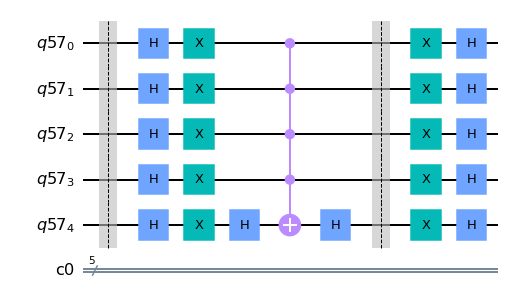

Unitary matrix:

[[0.94 -0.06 -0.06 ... -0.06 -0.06 -0.06]
 [-0.06 0.94 -0.06 ... -0.06 -0.06 -0.06]
 [-0.06 -0.06 0.94 ... -0.06 -0.06 -0.06]
 ...
 [-0.06 -0.06 -0.06 ... 0.94 -0.06 -0.06]
 [-0.06 -0.06 -0.06 ... -0.06 0.94 -0.06]
 [-0.06 -0.06 -0.06 ... -0.06 -0.06 0.94]]
Press enter to create the Grover circuit...


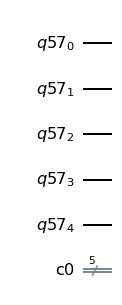

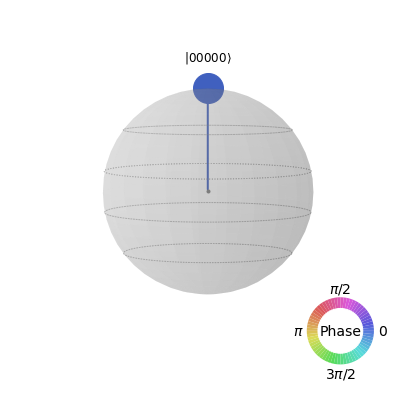

Statevector:
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


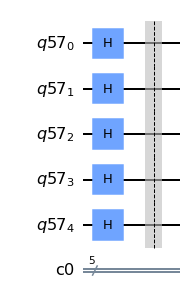

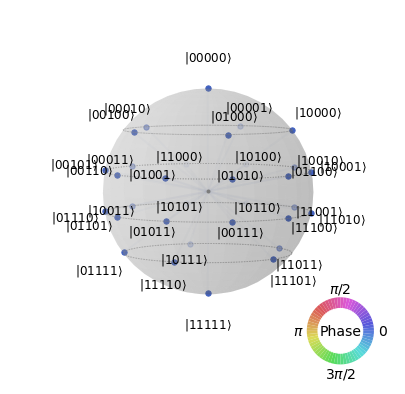

Statevector:
 Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


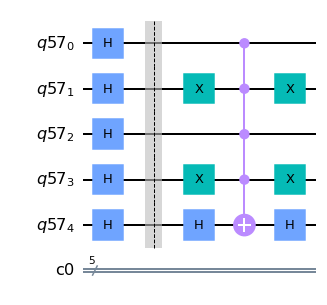

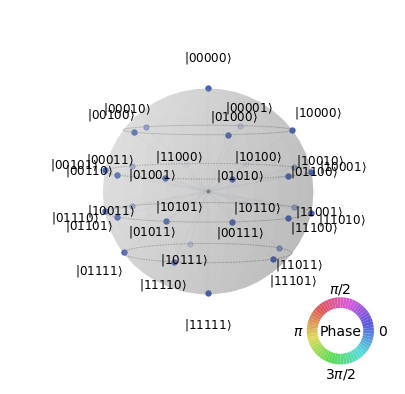

Statevector:
 Statevector([ 0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767-2.16489014e-17j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+3.08148791e-33j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j, -0.1767767+4.32978028e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767

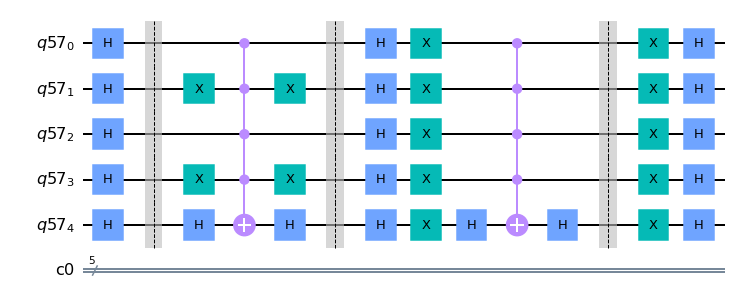

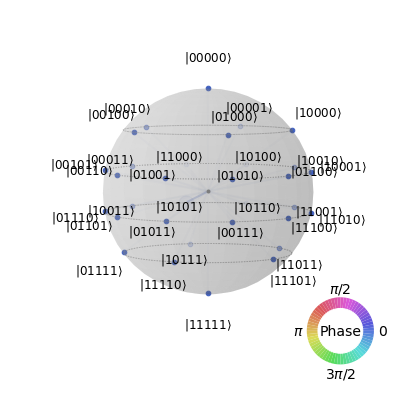

Statevector:
 Statevector([-0.15467961-9.47139437e-17j, -0.15467961-1.13656732e-16j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.32599521e-16j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.75897324e-16j,
             -0.15467961-1.32599521e-16j, -0.15467961-1.51542310e-16j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.32599521e-16j,
             -0.15467961-1.32599521e-16j, -0.15467961-1.51542310e-16j,
             -0.15467961-1.32599521e-16j, -0.15467961-1.51542310e-16j,
             -0.15467961-1.51542310e-16j, -0.15467961-1.70485099e-16j,
             -0.15467961-9.47139437e-17j, -0.15467961-1.35305634e-16j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.32599521e-16j,
             -0.15467961-1.35305634e-16j, -0.508233  -3.05790732e-16j,
             -0.15467961-1.32599521e-16j, -0.15467961-1.73191211e-16j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.32599521e-16j,
             -0.15467961-1.32599521e-16j, -0.15467961-1.5154231

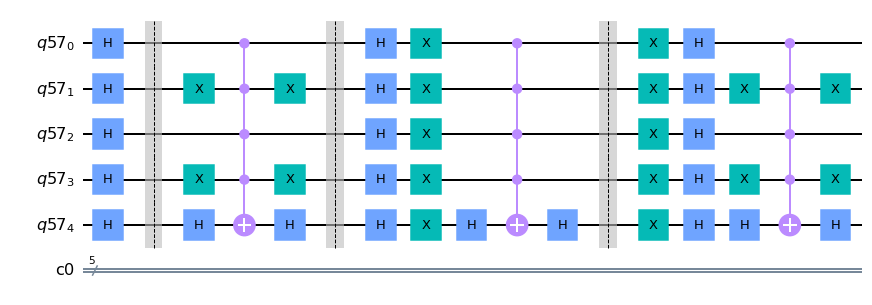

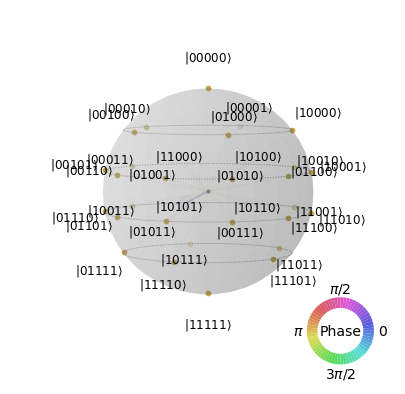

Statevector:
 Statevector([-0.15467961-9.47139437e-17j, -0.15467961-1.13656732e-16j,
             -0.15467961-7.57711549e-17j, -0.15467961-9.47139437e-17j,
             -0.15467961-1.13656732e-16j, -0.15467961-1.35305634e-16j,
             -0.15467961-9.47139437e-17j, -0.15467961-1.13656732e-16j,
             -0.15467961-7.57711549e-17j, -0.15467961-9.47139437e-17j,
             -0.15467961-5.68283662e-17j, -0.15467961-7.57711549e-17j,
             -0.15467961-9.47139437e-17j, -0.15467961-1.13656732e-16j,
             -0.15467961-7.57711549e-17j, -0.15467961-9.47139437e-17j,
             -0.15467961-7.57711549e-17j, -0.15467961-1.16362845e-16j,
             -0.15467961-5.68283662e-17j, -0.15467961-7.57711549e-17j,
             -0.15467961-1.16362845e-16j,  0.508233  +2.46256253e-16j,
             -0.15467961-7.57711549e-17j, -0.15467961-9.47139437e-17j,
             -0.15467961-5.68283662e-17j, -0.15467961-7.57711549e-17j,
             -0.15467961-3.78855775e-17j, -0.15467961-5.6828366

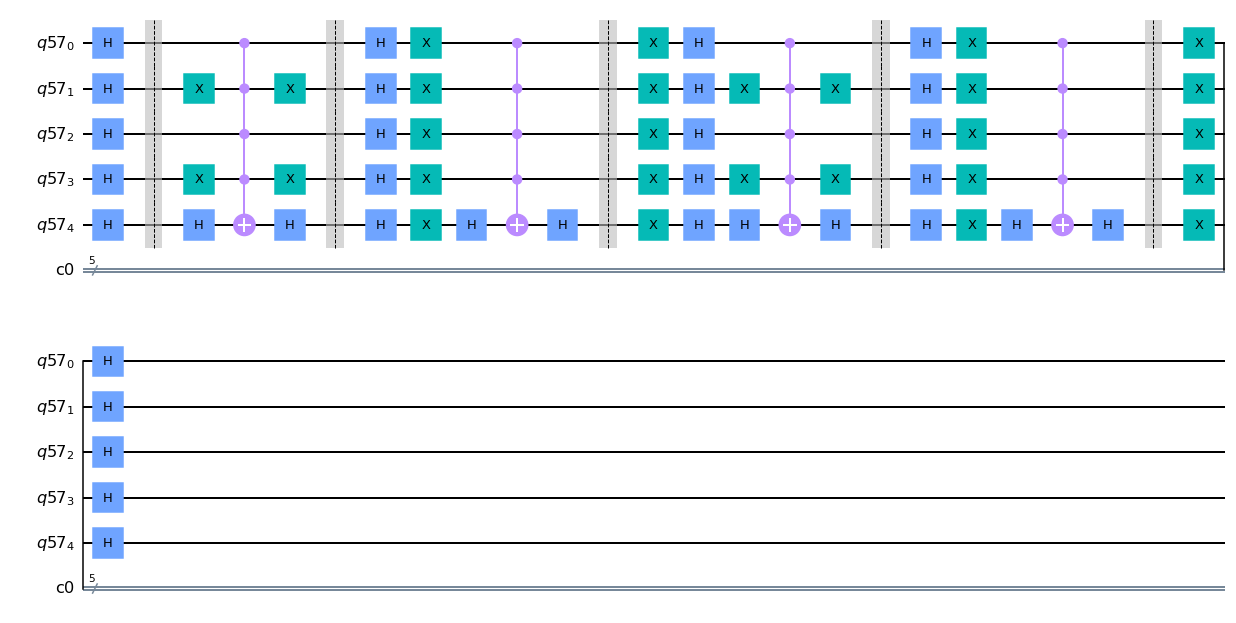

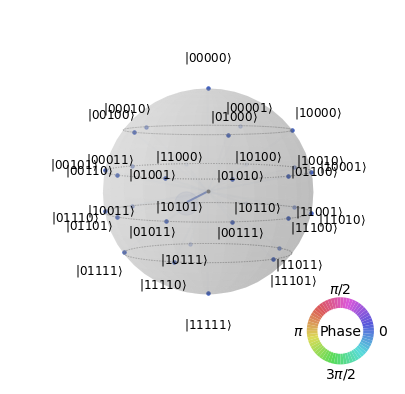

Statevector:
 Statevector([0.11324757+1.39364803e-16j, 0.11324757+1.34290842e-16j,
             0.11324757+1.72176419e-16j, 0.11324757+1.67102458e-16j,
             0.11324757+1.34290842e-16j, 0.11324757+1.67102458e-16j,
             0.11324757+1.67102458e-16j, 0.11324757+1.62028496e-16j,
             0.11324757+1.72176419e-16j, 0.11324757+1.67102458e-16j,
             0.11324757+2.04988035e-16j, 0.11324757+1.99914074e-16j,
             0.11324757+1.67102458e-16j, 0.11324757+1.62028496e-16j,
             0.11324757+1.99914074e-16j, 0.11324757+1.94840113e-16j,
             0.11324757+1.39364803e-16j, 0.11324757+1.53233630e-16j,
             0.11324757+1.72176419e-16j, 0.11324757+1.67102458e-16j,
             0.11324757+1.53233630e-16j, 0.77616018+9.35638458e-16j,
             0.11324757+1.67102458e-16j, 0.11324757+2.02620187e-16j,
             0.11324757+1.72176419e-16j, 0.11324757+1.67102458e-16j,
             0.11324757+2.04988035e-16j, 0.11324757+1.99914074e-16j,
             0.11324

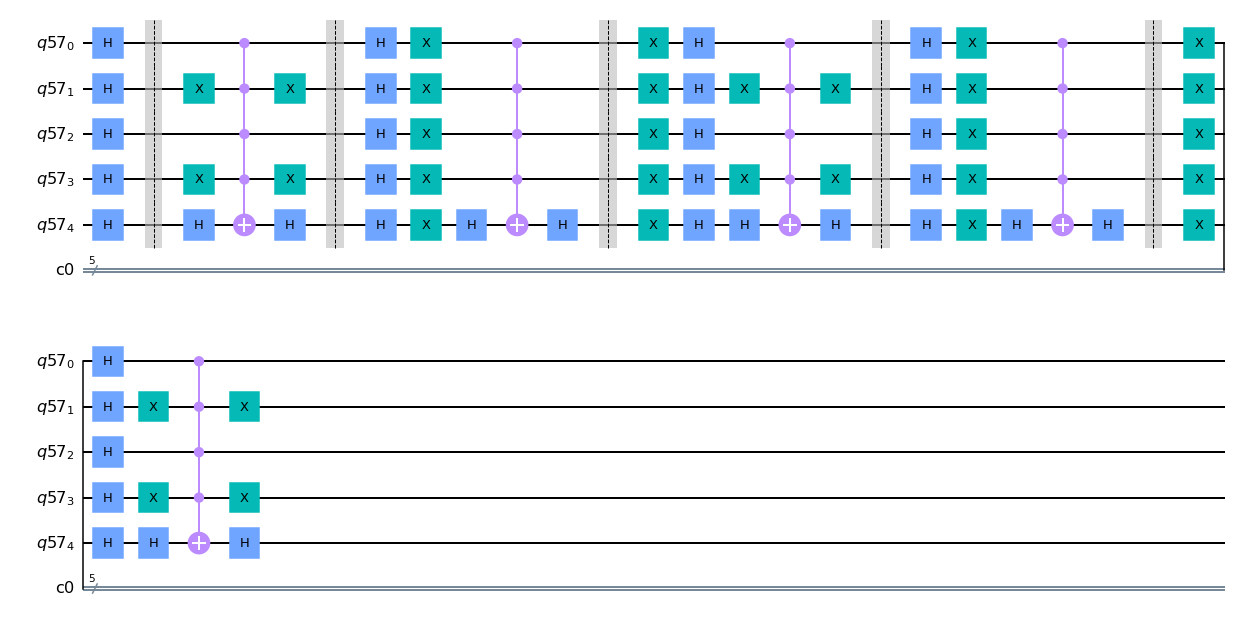

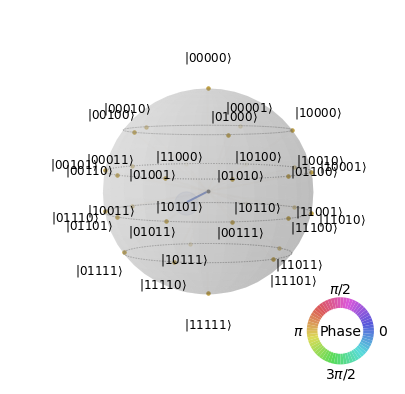

Statevector:
 Statevector([ 0.11324757+1.39364803e-16j,  0.11324757+1.34290842e-16j,
              0.11324757+1.44438764e-16j,  0.11324757+1.39364803e-16j,
              0.11324757+1.34290842e-16j,  0.11324757+1.12641940e-16j,
              0.11324757+1.39364803e-16j,  0.11324757+1.34290842e-16j,
              0.11324757+1.44438764e-16j,  0.11324757+1.39364803e-16j,
              0.11324757+1.49512725e-16j,  0.11324757+1.44438764e-16j,
              0.11324757+1.39364803e-16j,  0.11324757+1.34290842e-16j,
              0.11324757+1.44438764e-16j,  0.11324757+1.39364803e-16j,
              0.11324757+1.25495975e-16j,  0.11324757+1.39364803e-16j,
              0.11324757+1.30569937e-16j,  0.11324757+1.25495975e-16j,
              0.11324757+1.39364803e-16j, -0.77616018-8.67309113e-16j,
              0.11324757+1.25495975e-16j,  0.11324757+1.20422014e-16j,
              0.11324757+1.30569937e-16j,  0.11324757+1.25495975e-16j,
              0.11324757+1.35643898e-16j,  0.11324757+1.3056993

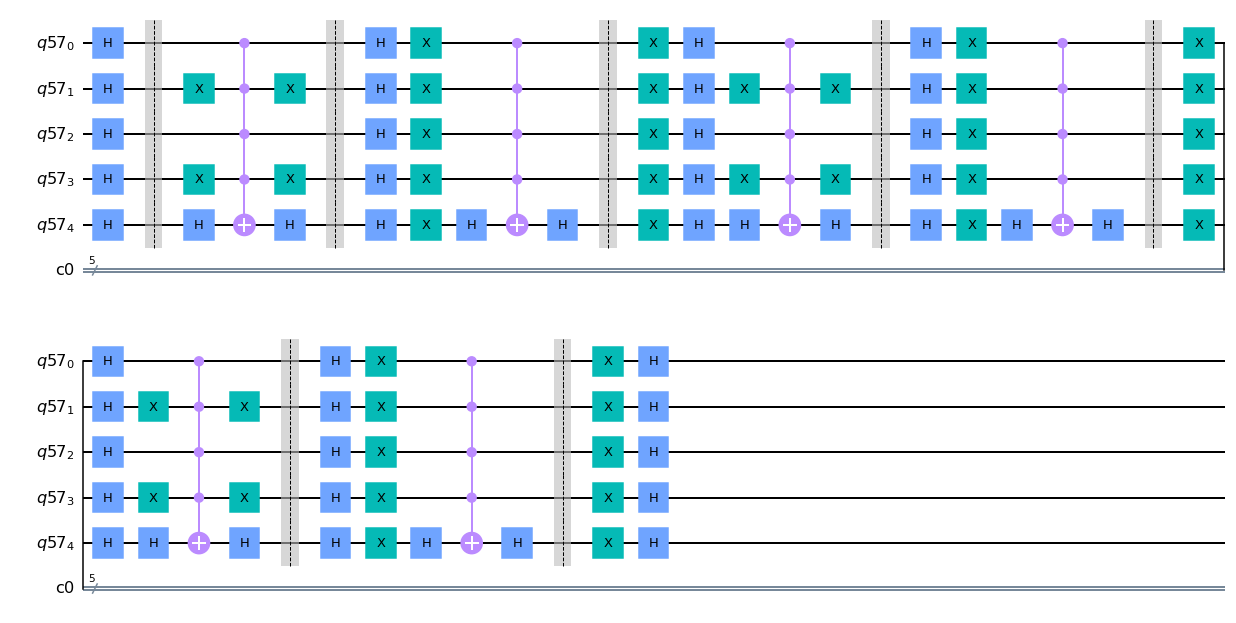

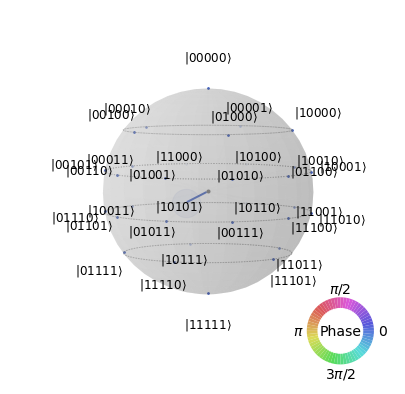

Statevector:
 Statevector([-0.05765959-1.07779394e-16j, -0.05765959-1.19914618e-16j,
             -0.05765959-1.09766695e-16j, -0.05765959-1.21901919e-16j,
             -0.05765959-1.19914618e-16j, -0.05765959-2.03085300e-16j,
             -0.05765959-1.21901919e-16j, -0.05765959-1.34037143e-16j,
             -0.05765959-1.09766695e-16j, -0.05765959-1.21901919e-16j,
             -0.05765959-1.11753997e-16j, -0.05765959-1.23889221e-16j,
             -0.05765959-1.21901919e-16j, -0.05765959-1.34037143e-16j,
             -0.05765959-1.23889221e-16j, -0.05765959-1.36024445e-16j,
             -0.05765959-1.07779394e-16j, -0.05765959-1.55432347e-16j,
             -0.05765959-1.09766695e-16j, -0.05765959-1.21901919e-16j,
             -0.05765959-1.55432347e-16j, -0.94706733-1.71377270e-15j,
             -0.05765959-1.21901919e-16j, -0.05765959-1.88497661e-16j,
             -0.05765959-1.09766695e-16j, -0.05765959-1.21901919e-16j,
             -0.05765959-1.11753997e-16j, -0.05765959-1.2388922

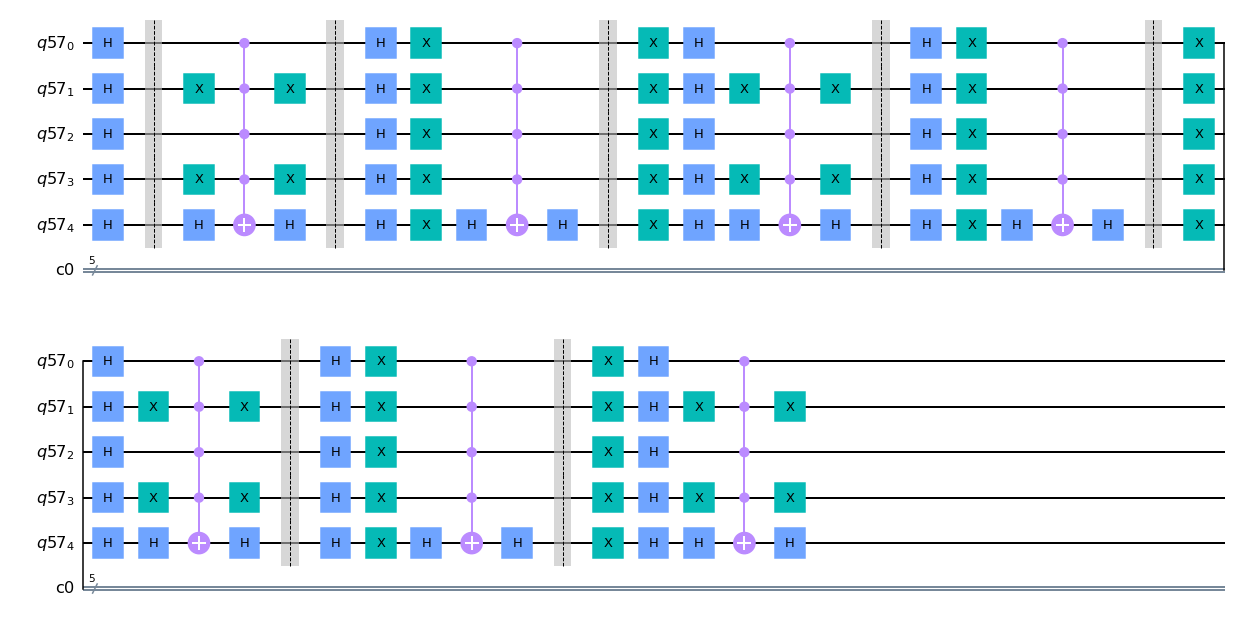

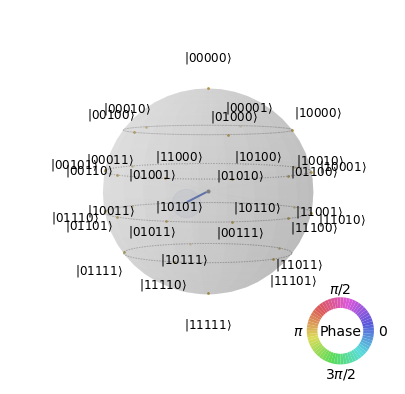

Statevector:
 Statevector([-0.05765959-1.07779394e-16j, -0.05765959-1.19914618e-16j,
             -0.05765959-9.56441699e-17j, -0.05765959-1.07779394e-16j,
             -0.05765959-1.19914618e-16j, -0.05765959-1.41563519e-16j,
             -0.05765959-1.07779394e-16j, -0.05765959-1.19914618e-16j,
             -0.05765959-9.56441699e-17j, -0.05765959-1.07779394e-16j,
             -0.05765959-8.35089459e-17j, -0.05765959-9.56441699e-17j,
             -0.05765959-1.07779394e-16j, -0.05765959-1.19914618e-16j,
             -0.05765959-9.56441699e-17j, -0.05765959-1.07779394e-16j,
             -0.05765959-1.00718131e-16j, -0.05765959-1.48371084e-16j,
             -0.05765959-8.85829071e-17j, -0.05765959-1.00718131e-16j,
             -0.05765959-1.48371084e-16j,  0.94706733+1.64518966e-15j,
             -0.05765959-1.00718131e-16j, -0.05765959-1.12853355e-16j,
             -0.05765959-8.85829071e-17j, -0.05765959-1.00718131e-16j,
             -0.05765959-7.64476831e-17j, -0.05765959-8.8582907

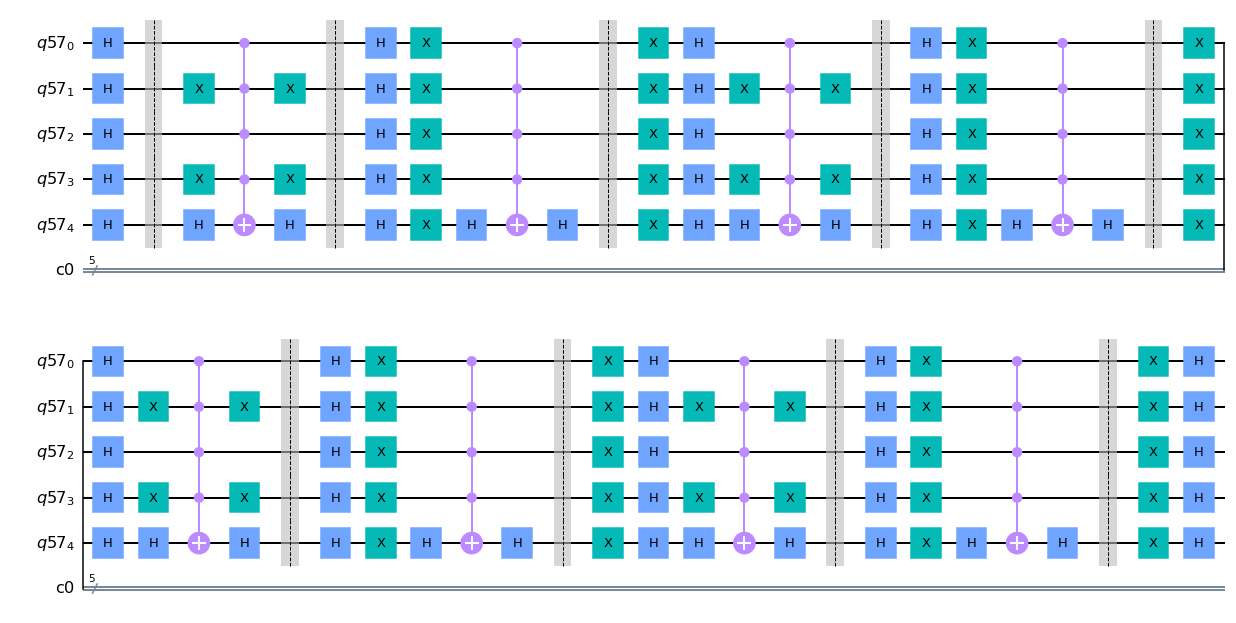

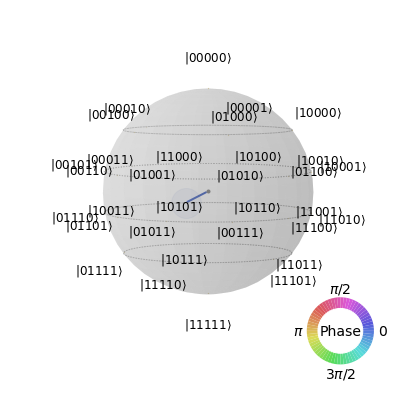

Statevector:
 Statevector([-0.00513585-8.65744641e-18j, -0.00513585-2.14216302e-17j,
             -0.00513585+2.84881784e-18j, -0.00513585-9.91536598e-18j,
             -0.00513585-2.14216302e-17j, -0.00513585+1.78222890e-17j,
             -0.00513585-9.91536598e-18j, -0.00513585-2.26795498e-17j,
             -0.00513585+2.84881784e-18j, -0.00513585-9.91536598e-18j,
             -0.00513585+1.43550821e-17j, -0.00513585+1.59089827e-18j,
             -0.00513585-9.91536598e-18j, -0.00513585-2.26795498e-17j,
             -0.00513585+1.59089827e-18j, -0.00513585-1.11732855e-17j,
             -0.00513585-8.65744641e-18j, -0.00513585+4.58242127e-18j,
             -0.00513585+2.84881784e-18j, -0.00513585-9.91536598e-18j,
             -0.00513585+4.58242127e-18j,  0.99959107+2.41273201e-15j,
             -0.00513585-9.91536598e-18j, -0.00513585+3.88422306e-17j,
             -0.00513585+2.84881784e-18j, -0.00513585-9.91536598e-18j,
             -0.00513585+1.43550821e-17j, -0.00513585+1.5908982

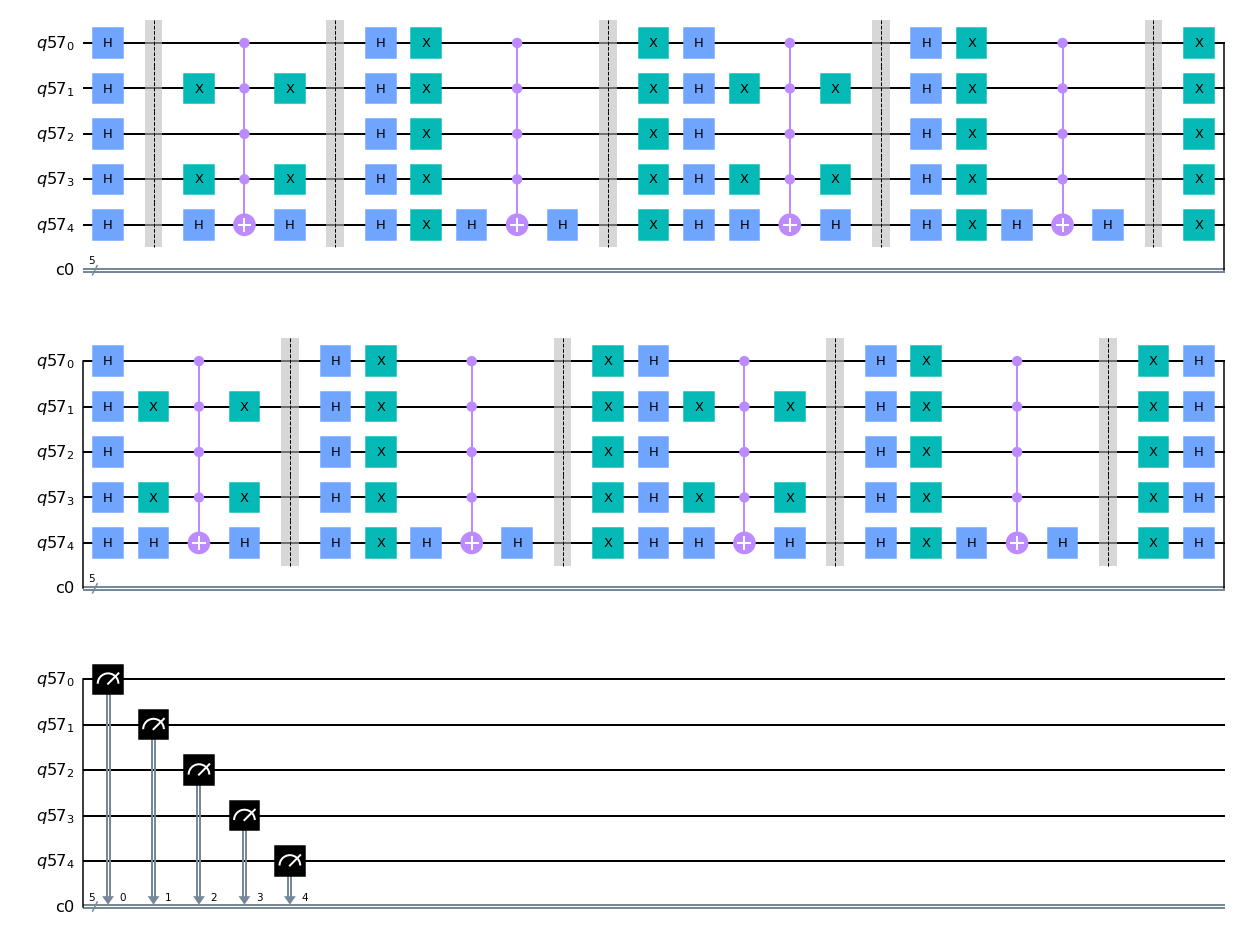

Press enter to run the Grover circuit...
Sending job to: qasm_simulator
Job Status: job has successfully run
Grover search outcome for |10101⟩ oracle


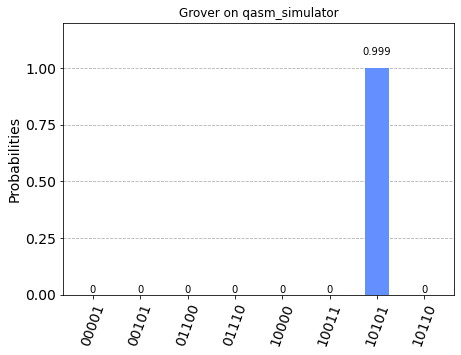

Enter 'Y' to run the Grover circuit on an IBMQ backend...Y
Loading IBMQ account...


IBMQAccountCredentialsNotFound: ignored

In [9]:
# Import the required functions
from grover_function import create_oracle, create_amplifier, create_grover, display_circuit, get_backend, run_grover, mitigated_results, transpile_circuit

# Main loop
def main():
    oracle_type=""
    ibmqbackend=""
    while oracle_type!=0:
        sample_oracle="1"
        print("\nCh 9: The Grover search algorithm ")
        print("----------------------------------")  
        size=int(input("Enter the number of qubits (2-5):\n"))
        if size>5: size=5
        for n in range(size-1):
            sample_oracle+="0"
        oracle_type=input("Input your "+str(size)+"-bit oracle. E.g: "+sample_oracle+":\n")
        oracle=create_oracle(oracle_type,size)
        print("Oracle circuit for |"+str(oracle_type)+"\u27E9")
        display_circuit(oracle,False, True)
        input("Press enter to create the amplifier circuit...")
        amplifier=create_amplifier(size)
        display_circuit(amplifier,False,True)
        input("Press enter to create the Grover circuit...")
        grover=create_grover(oracle,amplifier,True)
        display_circuit(grover,False,False)
        input("Press enter to run the Grover circuit...")
        sim_res=run_grover(oracle_type,grover,get_backend(""))
        answer=input("Enter 'Y' to run the Grover circuit on an IBMQ backend...")
        if answer in ["Y","y"]:
            ibmqbackend=get_backend("IBMQ")
            q_res=run_grover(oracle_type,grover,ibmqbackend)
            if size<4:
                input("Press enter to see the final, mitigated results")
                mitigated_results(ibmqbackend,grover,q_res[0],sim_res[0])
        input("Press enter to see the final, transpiled circuit")
        if not ibmqbackend:
            ibmqbackend=get_backend("IBMQ")
        transpile_circuit(grover, ibmqbackend)

if __name__ == '__main__':
    main()